# *Prediction of Welding Quality*

## **Problem Definition**

This project aims to predict steel weld quality, a key concern for industries like wind turbine manufacturing. By leveraging data, it seeks to both standardize expert knowledge and uncover new insights, enhancing industrial understanding of weld quality.

----

## **Data Collection**
We can access the welding data for your project via the following link: https://www.phase-trans.msm.cam.ac.uk/map/data/materials/welddb-b.html.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Let's add the headers to our data for clarity
data_file_path = 'welddb/welddb.data'
headers_file_path = 'welddb/headers.txt'
with open(headers_file_path, 'r') as f:
    headers = [line.strip() for line in f]
df = pd.read_csv(data_file_path, sep=r'\s+', header=None, names=headers)

In [3]:
df

,Carbon concentration (weight%),Silicon concentration (weight%),Manganese concentration (weight%),Sulphur concentration (weight%),Phosphorus concentration (weight%),Nickel concentration (weight%),Chromium concentration (weight%),Molybdenum concentration (weight%),Vanadium concentration (weight%),Copper concentration (weight%),...,Charpy temperature (deg C),Charpy impact toughness (J),Hardness (kgmm-2),50 % FATT,Primary ferrite in microstructure (%),Ferrite with second phase (%),Acicular ferrite (%),Martensite (%),Ferrite with carbide aggregate (%),Weld ID
0,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,...,N,N,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aaw
1,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,...,-28,100,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aawch
2,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,...,-38,100,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aht
3,0.037,0.31,1.03,0.007,0.014,0,N,N,N,N,...,N,N,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Baw
4,0.037,0.31,1.03,0.007,0.014,0,N,N,N,N,...,-48,100,N,N,32,28,40,0,0,Evans-Ni/CMn-1990/1991-0Bawch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,0.100,0.35,0.90,0.008,0.016,0.60,8.6,0.98,0.18,N,...,N,N,N,N,N,N,N,N,N,Birmingham-MAX35
1648,0.088,0.36,0.88,0.008,0.017,0.57,8.4,0.94,0.19,N,...,N,N,N,N,N,N,N,N,N,Birmingham-MAX36
1649,0.090,0.34,0.89,0.008,0.016,0.17,8.2,0.94,0.02,N,...,N,N,N,N,N,N,N,N,N,Birmingham-MAX37
1650,0.092,0.35,0.90,0.008,0.016,0.54,8.4,0.97,0.17,N,...,N,N,N,N,N,N,N,N,N,Birmingham-MAX38


Our dataset contains a variety of features related to chemical composition, mechanical properties, and microstructure.

----

## **Data Preprocessing**


Let's get to know our data more

In [4]:
# Let's see how many different sources we have

unique = []
for i in df['Weld ID'].unique():
    if i.split('/')[0] not in unique:
        unique.append(i.split('/')[0])
unique2 = []
for i in unique:
    if i.split('-')[0] not in unique2:
        try :
            unique2.append(i.split('-')[0].concat(i.split('-')[1]))
        except:
            unique2.append(i.split('-')[0])
unique3 = []
for i in unique2:
    if i.split('+')[0] not in unique3:
        unique3.append(i.split('+')[0])
unique3

['Evans',
 'Es',
 'KocakPEv',
 'KocakPREv',
 'SurianEtAl',
 'Alekseev&',
 'RaiterGonzal',
 'SvenGret',
 'PakSven',
 'JorgeEtAl',
 'Hunt&',
 'Kluket',
 'Cunh',
 'Pat',
 'Wats',
 'EvHtIp1979',
 'Stil',
 'Gar&K',
 'Ga&K',
 'PantK',
 'EPRI',
 'Chandel&',
 'Icici&',
 'Blond&',
 'Natsume',
 'Mart',
 'Sw&Rog',
 'Kik',
 'Wolst',
 'Ditt',
 'Inag&',
 'p9',
 'p10',
 'p11',
 'p12',
 'p13',
 'p14',
 'p15',
 'p16',
 'p21',
 'p22',
 'p23',
 'p24',
 'p25',
 'RC81033',
 'p26',
 'p28',
 'p29',
 'p30',
 'p31',
 'p32',
 'p33',
 'p34',
 'p35',
 'p36',
 'EvansLetter',
 'EvansLetterCo',
 'EvansLetterC',
 'Birmingham']

In [5]:
len(unique3)

59

We have 59 different sources in our dataset, this can lead to issues such as missing values, inconsistent units of measurement, or varying data formats...

We can see that the presence of an 'N' indicates that the value was not reported in the publication. We will replace this character with a `NaN` value.


In [6]:
df.replace('N', np.nan, inplace=True)

Let's check the variable types so we can convert them to the correct format.

In [7]:
df.dtypes.value_counts()

object     40
float64     4
Name: count, dtype: int64

The output shows that 40 columns are of type `object` (likely containing strings or improperly formatted data) and 4 columns are `float64` (numeric).

We will inspect and clean the `object` columns to ensure proper numeric conversions where needed.

First, we will convert the rows that can be converted, and then we will handle the remaining ones.


In [8]:
# Convert the variables to numeric if possible
def convert_to_numeric(column):
    try:
        return pd.to_numeric(column)
    except ValueError:
        return column  # If conversion fails, return the original column

df = df.apply(convert_to_numeric)


In [9]:
df.dtypes.value_counts()

float64    23
object     21
Name: count, dtype: int64

We conclude:

- **23 columns** are of type `float64`, indicating they have successfully been converted to numeric data types (floating-point numbers).
- **21 columns** are still of type `object`, meaning they likely contain non-numeric data, mixed types, or have values that couldn't be converted (e.g., strings or special characters).

Further cleaning may be needed for the non-numeric columns.

In [10]:
# Select only columns of type object
object_columns = df.select_dtypes(include=['object'])

# Loop through each object column and display non-numeric values
for column in object_columns.columns:
    print(f"Non-numeric values in column '{column}':")
    non_numeric_values = df[column][pd.to_numeric(df[column], errors='coerce').isna()].unique()
    print(non_numeric_values)
    print('\n')

Non-numeric values in column 'Sulphur concentration (weight%)':
['<0.002' nan]


Non-numeric values in column 'Molybdenum concentration (weight%)':
[nan '<0.01']


Non-numeric values in column 'Vanadium concentration (weight%)':
[nan '<0.0005' '<0.01' '<0.005' '<5']


Non-numeric values in column 'Copper concentration (weight%)':
[nan '<0.01']


Non-numeric values in column 'Cobalt concentration (weight%)':
[nan '<0.01']


Non-numeric values in column 'Tungsten concentration (weight%)':
[nan '<0.1']


Non-numeric values in column 'Titanium concentration (ppm)':
[nan '<5' '<100' '<0.01' '<10']


Non-numeric values in column 'Nitrogen concentration (ppm)':
[nan '67tot33res' '66totndres' '61tot34res' '54totndres' '54tot24res'
 '52tot18res' '50tot17res' '48tot18res']


Non-numeric values in column 'Aluminium concentration (ppm)':
[nan '<5' '<50' '<100' '<0.01']


Non-numeric values in column 'Boron concentration (ppm)':
[nan '<5' '<10']


Non-numeric values in column 'Niobium concentration

We can see that the non-numeric values in the `object` columns contain a mixture of:

1. **Special characters** like `<`, `+`, `-`, and ranges (e.g., `150-200`).
2. **Text-based values** (e.g., `'67tot33res'`).
3. **Units embedded in the values** (e.g., `'158(Hv30)'` or `'459Hv10'`).
4. **Categorical values** (e.g., `'AC'`/`'DC'`)
4. **Missing values**.

### 1. **Special characters (e.g., `<0.002`)**:
   - First we will replace values like `<0.002` with numeric approximations (e.g., `0.002`).

In [11]:
df.replace({r'<': '', }, regex=True, inplace=True)
df = df.apply(pd.to_numeric, errors='ignore')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11152\1716306164.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [12]:
df.dtypes.value_counts()

float64    37
object      7
Name: count, dtype: int64

### 2. **Ranges (e.g., `150-200`)**:
   - Now, we will extract the mean of the range or split it into two columns for the lower and upper bounds.

In fact, this variable, Interpass temperature (°C), describes the temperature of the material between multiple passes of the welding process. Maintaining a consistent interpass temperature is critical for ensuring the quality and mechanical properties of the weld. In some rows, the recorded value for this variable is given as a range, such as 150-200°C, rather than a single temperature.

Since we need a numerical value for further analysis, we will transform this interval into its median value, which in this case is 175°C. This allows us to approximate the interpass temperature while ensuring that the data remains consistent and usable for modeling purposes.

In [13]:
df1 = df.copy()

In [14]:
# Find the non-numeric entries in 'Nitrogen concentration (ppm)'
df1['Interpass temperature (deg C)_numeric'] = pd.to_numeric(df1['Interpass temperature (deg C)'], errors='coerce')

# Identify rows where the conversion resulted in NaN (indicating non-numeric values)
problematic_entries = df1[df1['Interpass temperature (deg C)_numeric'].isna() & ~df1['Interpass temperature (deg C)'].isna()]['Interpass temperature (deg C)'].unique()

df1 = df1.drop(columns=['Interpass temperature (deg C)_numeric'])

problematic_entries  

array(['150-200'], dtype=object)

In [15]:
# see the rows with a value of '150-200' in 'Interpass temperature (deg C)'
df[df['Interpass temperature (deg C)'] == '150-200'].head()

,Carbon concentration (weight%),Silicon concentration (weight%),Manganese concentration (weight%),Sulphur concentration (weight%),Phosphorus concentration (weight%),Nickel concentration (weight%),Chromium concentration (weight%),Molybdenum concentration (weight%),Vanadium concentration (weight%),Copper concentration (weight%),...,Charpy temperature (deg C),Charpy impact toughness (J),Hardness (kgmm-2),50 % FATT,Primary ferrite in microstructure (%),Ferrite with second phase (%),Acicular ferrite (%),Martensite (%),Ferrite with carbide aggregate (%),Weld ID
1166,0.08,0.45,0.96,0.007,0.015,0.21,9.1,0.96,0.19,0.03,...,NaN,NaN,459Hv10,NaN,2.0,NaN,NaN,NaN,NaN,PantK-1990-w1
1167,0.10,0.54,0.66,0.006,0.014,0.31,9.0,0.82,0.23,0.02,...,NaN,NaN,405Hv10,NaN,11.0,NaN,NaN,NaN,NaN,PantK-1990-w2
1168,0.09,0.46,0.99,0.012,0.021,0.22,9.5,0.96,0.19,0.03,...,NaN,NaN,451Hv10,NaN,4.0,NaN,NaN,NaN,NaN,PantK-1990-w3
1169,0.09,0.37,1.03,0.004,0.010,0.05,8.8,1.03,0.25,0.01,...,NaN,NaN,432Hv10,NaN,12.0,NaN,NaN,NaN,NaN,PantK-1990-w4.0
1170,0.09,0.37,1.03,0.004,0.010,0.05,8.8,1.03,0.25,0.01,...,NaN,NaN,264Hv10,NaN,NaN,NaN,NaN,NaN,NaN,PantK-1990-w4.1


In [16]:
def converter(x):
    try:
        return float(x)
    except:
        return 175

In [17]:
df['Interpass temperature (deg C)'] = df['Interpass temperature (deg C)'].apply(converter)
df['Interpass temperature (deg C)']

0       200.0
1       200.0
2       200.0
3       200.0
4       200.0
        ...  
1647    200.0
1648    200.0
1649    200.0
1650    200.0
1651    200.0
Name: Interpass temperature (deg C), Length: 1652, dtype: float64

In [18]:
df.dtypes.value_counts()

float64    38
object      6
Name: count, dtype: int64

### 3. **Text-based values (e.g., `'67tot33res'`)**:
   - We will investigate further to encode them meaningfully.

Let's address the column: **'Nitrogen concentration (ppm)'**.

In [19]:
df1 = df.copy()

In [20]:
# Find the non-numeric entries in 'Nitrogen concentration (ppm)'
df1['Nitrogen concentration (ppm)_numeric'] = pd.to_numeric(df1['Nitrogen concentration (ppm)'], errors='coerce')

# Identify rows where the conversion resulted in NaN (indicating non-numeric values)
problematic_entries = df1[df1['Nitrogen concentration (ppm)_numeric'].isna() & ~df1['Nitrogen concentration (ppm)'].isna()]['Nitrogen concentration (ppm)'].unique()

df1 = df1.drop(columns=['Nitrogen concentration (ppm)_numeric'])

problematic_entries  

array(['67tot33res', '66totndres', '61tot34res', '54totndres',
       '54tot24res', '52tot18res', '50tot17res', '48tot18res'],
      dtype=object)

After extensive investigation into the meaning of these values, we discovered through various articles that the notation **XtotYres** is an abbreviation for **X total** and **Y residual**. This indicates that the nitrogen concentration in the material is divided into two components: the total concentration (X) and the residual concentration (Y), which remains after some process (nd stands for non-detected).

For the purpose of our analysis, we will focus on the total concentration (X), as it represents the complete amount of nitrogen present in the material before any processes or reactions occur. The residual concentration often reflects secondary or incomplete reactions and is typically less representative of the material's initial state or overall chemical composition. By considering the total concentration, we ensure that our analysis captures the full nitrogen content, which is more relevant for evaluating the material's properties and predicting weld quality.

*(We have only 59 values containing residual concentrations, so we don't need to consider the residual concentration as a new independent variable.)*


We will therefore replace the values of these cases with the total concentration (X)

In [21]:
# convert the problematic entries to numeric
def converter(x):
    try:
        return float(x)
    except:
        return float(x[:2])

In [22]:
df['Nitrogen concentration (ppm)'] = df['Nitrogen concentration (ppm)'].apply(converter)

In [23]:
df['Nitrogen concentration (ppm)']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
1647    398.0
1648    394.0
1649     96.0
1650     99.0
1651    103.0
Name: Nitrogen concentration (ppm), Length: 1652, dtype: float64

Now, all **'Nitrogen concentration (ppm)'** values are numerical.


### 4. **Embedded units (e.g., `'158(Hv30)'`)**:
   - Now, we will investigate more on this feature.

In [24]:
df1 = df.copy()

In [25]:
df1['Hardness (kgmm-2)_numeric'] = pd.to_numeric(df1['Hardness (kgmm-2)'], errors='coerce')

# Identify rows where the conversion resulted in NaN (indicating non-numeric values)
problematic_entries = df1[df1['Hardness (kgmm-2)_numeric'].isna() & ~df1['Hardness (kgmm-2)'].isna()]['Hardness (kgmm-2)'].unique()

df1 = df1.drop(columns=['Hardness (kgmm-2)_numeric'])

problematic_entries  

array(['158(Hv30)', '155(Hv30)', '153(Hv30)', '161(Hv30)', '168(Hv30)',
       '203(Hv30)', '157(Hv30)', '174(Hv30)', '144(Hv30)', '143(Hv30)',
       '154(Hv30)', '170(Hv30)', '459Hv10', '405Hv10', '451Hv10',
       '432Hv10', '264Hv10', '241Hv10', '251Hv10', '225Hv10', '233Hv10',
       '208Hv10', '373Hv10', '224Hv10', '210Hv10', '212Hv10', '202Hv10',
       '204Hv10', '201Hv10', '398Hv10', '249Hv10', '226Hv10', '234Hv10',
       '219Hv10', '467Hv10', '277Hv10', '254Hv10', '263Hv10', '237Hv10',
       '362Hv10', '291Hv10', '262Hv10', '266Hv10', '253Hv10', '257Hv10',
       '246Hv10', '264Hv5', '269Hv5', '233Hv5', '226Hv5'], dtype=object)

In [26]:
#Remove '(' and ')' from the 'Hardness (kgmm-2)' column
df['Hardness (kgmm-2)'] = df['Hardness (kgmm-2)'].str.replace('(', '')
df['Hardness (kgmm-2)'] = df['Hardness (kgmm-2)'].str.replace(')', '')


In [29]:
df1 = df.copy()

In [30]:
df1['Hardness (kgmm-2)_numeric'] = pd.to_numeric(df1['Hardness (kgmm-2)'], errors='coerce')

# Identify rows where the conversion resulted in NaN (indicating non-numeric values)
problematic_entries = df1[df1['Hardness (kgmm-2)_numeric'].isna() & ~df1['Hardness (kgmm-2)'].isna()]['Hardness (kgmm-2)'].unique()

df1 = df1.drop(columns=['Hardness (kgmm-2)_numeric'])

problematic_entries  

array(['158Hv30', '155Hv30', '153Hv30', '161Hv30', '168Hv30', '203Hv30',
       '157Hv30', '174Hv30', '144Hv30', '143Hv30', '154Hv30', '170Hv30',
       '459Hv10', '405Hv10', '451Hv10', '432Hv10', '264Hv10', '241Hv10',
       '251Hv10', '225Hv10', '233Hv10', '208Hv10', '373Hv10', '224Hv10',
       '210Hv10', '212Hv10', '202Hv10', '204Hv10', '201Hv10', '398Hv10',
       '249Hv10', '226Hv10', '234Hv10', '219Hv10', '467Hv10', '277Hv10',
       '254Hv10', '263Hv10', '237Hv10', '362Hv10', '291Hv10', '262Hv10',
       '266Hv10', '253Hv10', '257Hv10', '246Hv10', '264Hv5', '269Hv5',
       '233Hv5', '226Hv5'], dtype=object)


In this column, we have two types of hardness values:

1. **Numerical values**: These are already standardized, such as `257`, `153`, etc.
2. **Mixed values**: These values are formatted as `xHVy` (e.g., `150Hv30`), where `x` is the hardness value and `y` is the load in kgf used during the test.

We need to standardize all the values in this column so that they are comparable, assuming a standard load of **10 kgf**.

We will use the following formula to standardize values to a common load (e.g., 10 kgf):



$$
Hv_{\text{standard}} = Hv_{\text{measured}} \times \left( \frac{L_{\text{standard}}}{L_{\text{measured}}} \right)^n
$$

Where:
- $ Hv_{\text{standard}} $ is the standardized hardness value.
- $ Hv_{\text{measured}} $ is the hardness value measured at a specific load.
- $  L_{\text{standard}} $ is the standard load we will choose (in this case, **10 kgf**).
- $  L_{\text{measured}} $ is the load used during the measurement (extracted from the notation `xHVy`).
- $  n  $ is an empirical constant, typically around **0.2** for metals.



For values that don't mention a load (e.g., `257`), we will assume the default load used was **10 kgf**, meaning no adjustment is necessary.


In [31]:
n=0.2
L_standard = 10

def transformer(x):
    try:
        return float(x)
    except:
        if x != np.nan :
            liste=x.split('Hv')
            L_measured = float(liste[1])
            HV_measured = float(liste[0])
            return HV_measured*((L_standard/L_measured)**n)

In [32]:
df['Hardness (kgmm-2)'] = df['Hardness (kgmm-2)'].apply(transformer)
df['Hardness (kgmm-2)'].unique()

array([         nan, 257.        , 227.        , 224.        ,
       226.        , 234.        , 217.        , 213.        ,
       209.        , 259.        , 239.        , 223.        ,
       230.        , 252.        , 241.        , 231.        ,
       229.        , 180.        , 174.        , 220.        ,
       184.        , 193.        , 189.        , 181.        ,
       183.        , 194.        , 216.        , 191.        ,
       164.        , 154.        , 265.        , 225.        ,
       196.        , 202.        , 197.        , 172.        ,
       126.83316676, 124.42494207, 122.81945895, 129.24139144,
       134.86058238, 162.95653704, 126.0304252 , 139.67703175,
       115.59478489, 114.79204333, 123.62220051, 136.4660655 ,
       459.        , 405.        , 451.        , 432.        ,
       264.        , 251.        , 233.        , 208.        ,
       373.        , 210.        , 212.        , 204.        ,
       201.        , 398.        , 249.        , 219.  

Well done, now the hardness column is float type

In [33]:
df.dtypes.value_counts()

float64    40
object      4
Name: count, dtype: int64

### 5. **Non-numeric categories (e.g., `'AC'`, `'DC'`, `'+'`, `'-'`)**:
   - These categorical values can be encoded later (e.g., with `LabelEncoder` or `OneHotEncoder`).


In [34]:
object_columns = df.select_dtypes(include=['object']).columns

df[object_columns]

,AC or DC,Electrode positive or negative,Type of weld,Weld ID
0,DC,+,MMA,Evans-Ni/CMn-1990/1991-0Aaw
1,DC,+,MMA,Evans-Ni/CMn-1990/1991-0Aawch
2,DC,+,MMA,Evans-Ni/CMn-1990/1991-0Aht
3,DC,+,MMA,Evans-Ni/CMn-1990/1991-0Baw
4,DC,+,MMA,Evans-Ni/CMn-1990/1991-0Bawch
...,...,...,...,...
1647,NaN,+,SA,Birmingham-MAX35
1648,NaN,+,SA,Birmingham-MAX36
1649,NaN,+,SA,Birmingham-MAX37
1650,NaN,+,SA,Birmingham-MAX38


In [35]:
#Onehot encoding to ac vs dc and Electrode positive or negative

df222 = pd.get_dummies(df, columns=['AC or DC', 'Electrode positive or negative'])[['AC or DC_AC',	'AC or DC_DC', 'Electrode positive or negative_+', 'Electrode positive or negative_-',	'Electrode positive or negative_0']]


<Axes: >

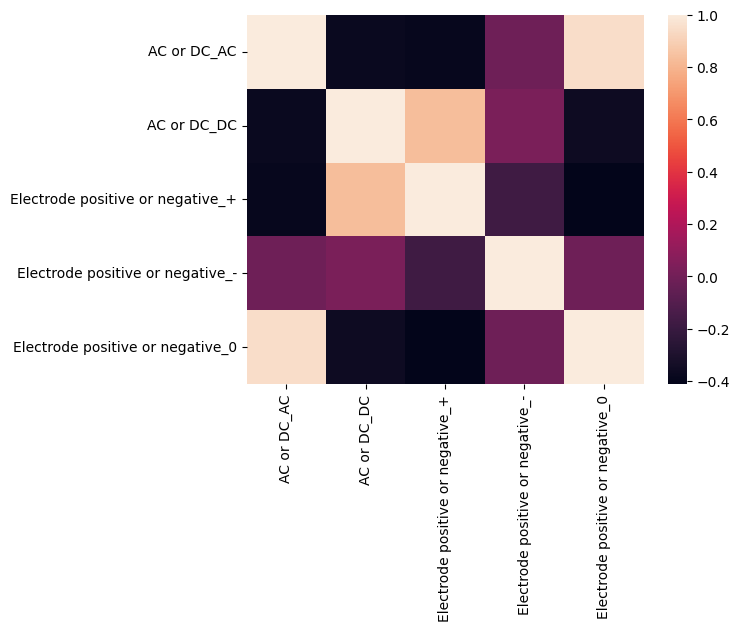

In [36]:
# correlation matrix plot 

import seaborn as sns

corr = df222.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


In [37]:
df['AC or DC'].isna().sum()

np.int64(215)

In [38]:
df['Electrode positive or negative'].isna().sum()

np.int64(156)

We can see that the column ac or dc has more Nan values than  the Electrode positive or negative, and since they r correlated with the eletrode column, we will consider only the electrode column

In [39]:
df.drop(columns=['AC or DC'], inplace=True)

In [40]:
df = pd.get_dummies(df, columns=['Electrode positive or negative'])

Since we want to build a prediction model, we should deal with other categorical variables, let's adress the Type of weld column

In [41]:
# see all the unique values in the 'Type of weld' column
df['Type of weld'].unique()

array(['MMA', 'ShMA', 'FCA', 'SA', 'TSA', 'SAA', 'GTAA', 'GMAA', 'NGSAW',
       'NGGMA'], dtype=object)

In [42]:
#onehot encoding to 'Type of weld' column

df = pd.get_dummies(df, columns=['Type of weld'])

In [43]:
# see the columns names

df.head()

,Carbon concentration (weight%),Silicon concentration (weight%),Manganese concentration (weight%),Sulphur concentration (weight%),Phosphorus concentration (weight%),Nickel concentration (weight%),Chromium concentration (weight%),Molybdenum concentration (weight%),Vanadium concentration (weight%),Copper concentration (weight%),...,Type of weld_FCA,Type of weld_GMAA,Type of weld_GTAA,Type of weld_MMA,Type of weld_NGGMA,Type of weld_NGSAW,Type of weld_SA,Type of weld_SAA,Type of weld_ShMA,Type of weld_TSA
0,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,...,False,False,False,True,False,False,False,False,False,False
1,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,...,False,False,False,True,False,False,False,False,False,False
2,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,...,False,False,False,True,False,False,False,False,False,False
3,0.037,0.31,1.03,0.007,0.014,0.0,NaN,NaN,NaN,NaN,...,False,False,False,True,False,False,False,False,False,False
4,0.037,0.31,1.03,0.007,0.014,0.0,NaN,NaN,NaN,NaN,...,False,False,False,True,False,False,False,False,False,False


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 54 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Carbon concentration (weight%)                1652 non-null   float64
 1   Silicon concentration (weight%)               1652 non-null   float64
 2   Manganese concentration (weight%)             1652 non-null   float64
 3   Sulphur concentration (weight%)               1648 non-null   float64
 4   Phosphorus concentration (weight%)            1642 non-null   float64
 5   Nickel concentration (weight%)                697 non-null    float64
 6   Chromium concentration (weight%)              784 non-null    float64
 7   Molybdenum concentration (weight%)            793 non-null    float64
 8   Vanadium concentration (weight%)              928 non-null    float64
 9   Copper concentration (weight%)                578 non-null    f

Let's explore more the variables

Based on related articles in the domain of welding and materials science, it is common to handle missing values of certain chemical elements differently. For instance:

- Missing values of **Phosphorus (P)** and **Sulphur (S)** are imputed using the **mean values** from the dataset.
- Other missing values of other elements such as **Manganese (Mn)**, **Nickel (Ni)**, etc., are set to **0** because these elements are not deliberately added and are likely close to the detection limit of the analytical techniques used.

Therefore, we will implement this preprocessing step to ensure that the dataset is correctly handled for the prediction task.

In [45]:
df['Sulphur concentration (weight%)'] = df['Sulphur concentration (weight%)'].fillna(df['Sulphur concentration (weight%)'].mean())
df['Phosphorus concentration (weight%)'] = df['Phosphorus concentration (weight%)'].fillna(df['Phosphorus concentration (weight%)'].mean())

# Replace missing values for all other concentrations with 0 (as they were not deliberately added)
elements_to_zero = ['Manganese concentration (weight%)', 'Sulphur concentration (weight%)',
       'Phosphorus concentration (weight%)', 'Nickel concentration (weight%)',
       'Chromium concentration (weight%)', 'Molybdenum concentration (weight%)',
       'Vanadium concentration (weight%)', 'Copper concentration (weight%)',
       'Cobalt concentration (weight%)', 'Tungsten concentration (weight%)',
       'Oxygen concentration (ppm)', 'Titanium concentration (ppm)',
       'Nitrogen concentration (ppm)', 'Aluminium concentration (ppm)',
       'Boron concentration (ppm)', 'Niobium concentration (ppm)',
       'Tin concentration (ppm)', 'Arsenic concentration (ppm)',
       'Antimony concentration (ppm)']

# Replace missing values with 0 for the other elements
df[elements_to_zero] = df[elements_to_zero].fillna(0)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 54 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Carbon concentration (weight%)                1652 non-null   float64
 1   Silicon concentration (weight%)               1652 non-null   float64
 2   Manganese concentration (weight%)             1652 non-null   float64
 3   Sulphur concentration (weight%)               1652 non-null   float64
 4   Phosphorus concentration (weight%)            1652 non-null   float64
 5   Nickel concentration (weight%)                1652 non-null   float64
 6   Chromium concentration (weight%)              1652 non-null   float64
 7   Molybdenum concentration (weight%)            1652 non-null   float64
 8   Vanadium concentration (weight%)              1652 non-null   float64
 9   Copper concentration (weight%)                1652 non-null   f

### Justification for Replacing Voltage and Current Columns with a Power Column

The **Voltage** (in volts) and **Current** (in amperes) columns were replaced by a single column representing **Power** (in watts). This decision is based on the physical relationship between these three quantities, where electrical power is defined as the product of voltage and current:

$$
P = U \times I
$$

Adding a power column captures the interaction between voltage and current in a single variable, reducing data redundancy and simplifying the analysis while retaining complete information. Moreover, in many modeling applications, power is a more representative measure of a system's overall electrical behavior than its individual components (voltage and current).


In [47]:
df['Puissance (W)']=df['Voltage (V)']*df['Current (A)']
df['Puissance (W)']

0        3570.0
1        3570.0
2        3570.0
3        3570.0
4        3570.0
         ...   
1647    13500.0
1648    13500.0
1649    13500.0
1650    13500.0
1651    13500.0
Name: Puissance (W), Length: 1652, dtype: float64

In [48]:
df.drop(['Current (A)', 'Voltage (V)', 'Weld ID'], axis=1, inplace=True)


In [49]:
bool_columns = df.select_dtypes(include='bool').columns


In [50]:
# Convert all boolean columns to integers (0 for False, 1 for True)
df[bool_columns] = df[bool_columns].astype(int)
df

,Carbon concentration (weight%),Silicon concentration (weight%),Manganese concentration (weight%),Sulphur concentration (weight%),Phosphorus concentration (weight%),Nickel concentration (weight%),Chromium concentration (weight%),Molybdenum concentration (weight%),Vanadium concentration (weight%),Copper concentration (weight%),...,Type of weld_GMAA,Type of weld_GTAA,Type of weld_MMA,Type of weld_NGGMA,Type of weld_NGSAW,Type of weld_SA,Type of weld_SAA,Type of weld_ShMA,Type of weld_TSA,Puissance (W)
0,0.037,0.30,0.65,0.008,0.012,0.00,0.0,0.00,0.00,0.0,...,0,0,1,0,0,0,0,0,0,3570.0
1,0.037,0.30,0.65,0.008,0.012,0.00,0.0,0.00,0.00,0.0,...,0,0,1,0,0,0,0,0,0,3570.0
2,0.037,0.30,0.65,0.008,0.012,0.00,0.0,0.00,0.00,0.0,...,0,0,1,0,0,0,0,0,0,3570.0
3,0.037,0.31,1.03,0.007,0.014,0.00,0.0,0.00,0.00,0.0,...,0,0,1,0,0,0,0,0,0,3570.0
4,0.037,0.31,1.03,0.007,0.014,0.00,0.0,0.00,0.00,0.0,...,0,0,1,0,0,0,0,0,0,3570.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,0.100,0.35,0.90,0.008,0.016,0.60,8.6,0.98,0.18,0.0,...,0,0,0,0,0,1,0,0,0,13500.0
1648,0.088,0.36,0.88,0.008,0.017,0.57,8.4,0.94,0.19,0.0,...,0,0,0,0,0,1,0,0,0,13500.0
1649,0.090,0.34,0.89,0.008,0.016,0.17,8.2,0.94,0.02,0.0,...,0,0,0,0,0,1,0,0,0,13500.0
1650,0.092,0.35,0.90,0.008,0.016,0.54,8.4,0.97,0.17,0.0,...,0,0,0,0,0,1,0,0,0,13500.0


In [52]:
# save the cleaned data

df.to_csv('welddb_cleaned', index=False)